# **Processo Seletivo Engenharia de dados MYRA - Rodolfo Silva**

### Importando o PySpark e Inicializando Sessão

#### Importando o PySpark e Suas Dependências

In [2]:
import findspark
findspark.init()
#findspark.find()

In [3]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
from pyspark.sql import functions as F
from pyspark import SparkContext,SQLContext

#### Inicializando Sessão PySpark

In [4]:
spark = SparkSession.builder.master("local").getOrCreate()
sc = spark.sparkContext

### Importando o Matplotlib

In [14]:
import matplotlib.pyplot as plt

### Importando os Datasets "*Brazilian E-Commerce Public Dataset by Olist*" Baixados do Kaggle

In [90]:
# Importando o dataset olist_orders_dataset.csv
df_orders = spark.read.csv("./olist_orders_dataset.csv", header=True, inferSchema=False, sep=",")
df_orders.show(n=5)

+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+
|            order_id|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|
+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+
|e481f51cbdc54678b...|9ef432eb625129730...|   delivered|     2017-10-02 10:56:33|2017-10-02 11:07:15|         2017-10-04 19:55:00|          2017-10-10 21:25:13|          2017-10-18 00:00:00|
|53cdb2fc8bc7dce0b...|b0830fb4747a6c6d2...|   delivered|     2018-07-24 20:41:37|2018-07-26 03:24:27|         2018-07-26 14:31:00|          2018-08-07 15:27:45|          2018-08-13 00:00:00|
|47770eb9100c2d0c4...|41ce2a54c0b03bf34...|  

In [294]:
# Importando o dataset olist_order_reviews_dataset.csv
df_order_reviews = spark.read.csv("./olist_order_reviews_dataset.csv", header=True, inferSchema=False, sep=",")
df_order_reviews.show(n=5)

+--------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+
|           review_id|            order_id|review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|
+--------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+
|7bc2406110b926393...|73fc7af87114b3971...|           4|                null|                  null| 2018-01-18 00:00:00|    2018-01-18 21:46:59|
|80e641a11e56f04c1...|a548910a1c6147796...|           5|                null|                  null| 2018-03-10 00:00:00|    2018-03-11 03:05:13|
|228ce5500dc1d8e02...|f9e4b658b201a9f2e...|           5|                null|                  null| 2018-02-17 00:00:00|    2018-02-18 14:36:24|
|e64fb393e7b32834b...|658677c97b385a9be...|           5|                null|  Recebi bem antes ...| 2017-04-21 00:00:00|   

In [276]:
df_order_reviews.select("review_id").collect()[1]

Row(review_id='80e641a11e56f04c1ad469d5645fdfde')

In [311]:
# Importando o dataset olist_order_items_dataset.csv
df_order_items = spark.read.csv("./olist_order_items_dataset.csv", header=True, inferSchema=False, sep=",")
df_order_items.show(n=5)

+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date| price|freight_value|
+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35| 58.90|        13.29|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13|239.90|        19.93|
|000229ec398224ef6...|            1|c777355d18b72b67a...|5b51032eddd242adc...|2018-01-18 14:48:30|199.00|        17.87|
|00024acbcdf0a6daa...|            1|7634da152a4610f15...|9d7a1d34a50524090...|2018-08-15 10:10:18| 12.99|        12.79|
|00042b26cf59d7ce6...|            1|ac6c3623068f30de0...|df560393f3a51e745...|2017-02-13 13:57:51|199.90|        18.14|
+--------------------+-------------+----

In [93]:
# Importando o dataset olist_products_dataset.csv
df_products = spark.read.csv("./olist_products_dataset.csv", header=True, inferSchema=False, sep=",")
df_products.show(n=5)

+--------------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+
|          product_id|product_category_name|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|product_length_cm|product_height_cm|product_width_cm|
+--------------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+
|1e9e8ef04dbcff454...|           perfumaria|                 40|                       287|                 1|             225|               16|               10|              14|
|3aa071139cb16b67c...|                artes|                 44|                       276|                 1|            1000|               30|               18|              20|
|96bd76ec8810374ed...|        esporte_lazer|                 46|                       250|    

### Contando a Quantidade de Linhas de Cada um dos Datasets Acima

In [94]:
# Numero de linhas do olist_orders_dataset
df_orders.count()

99441

In [95]:
# Numero de linhas do olist_order_reviews_dataset
df_order_reviews.count()

104162

In [96]:
# Numero de linhas do olist_order_items_dataset
df_order_items.count()

112650

In [97]:
# Numero de linhas do olist_products_dataset
df_products.count()

32951

### Consolidacao dos Datasets em um Unico Dataframe (Sem Repetição de Colunas)

#### Unindo os DataFrames df_orders e df_order_reviews

In [305]:
df_join_1 = df_orders.join(df_order_reviews, how="outer", on=["order_id"])
df_join_1.show(n=5)

+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+--------------------+--------------------+----------------------+--------------------+-----------------------+
|            order_id|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|           review_id|        review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|
+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+--------------------+--------------------+----------------------+--------------------+-----------------------+
| tive que ir até ...|            

#### Unindo os DataFrames df_join_1 e df_order_items

In [306]:
df_join_2 = df_join_1.join(df_order_items, how="outer", on=["order_id"])
df_join_2.show(n=5)

+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+--------------------+--------------------+----------------------+--------------------+-----------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+
|            order_id|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|           review_id|        review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|order_item_id|          product_id|           seller_id|shipping_limit_date|price|freight_value|
+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+----

#### Unindo os DataFrames df_join_2 e df_products

In [324]:
df_join_3 = df_join_2.join(df_products, how="left", on=["product_id"])
df_join_3.show(n=5)

+--------------------+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+--------------------+--------------------+----------------------+--------------------+-----------------------+-------------+--------------------+-------------------+-----+-------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+
|          product_id|            order_id|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|           review_id|        review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|order_item_id|           seller_id|shipping_limit_date|price|freight_value|product

### Total de linhas do DataFrame final unificado

In [327]:
# Quantidade de linhas de cada dataframe unificado
print(f'df_join_1: {df_join_1.count()}, df_join_2: {df_join_2.count()}, df_join_3: {df_join_3.count()}')

df_join_1: 104930, df_join_2: 119030, df_join_3: 119030


In [328]:
# Quantidade de linhas do dataframe final unificado
df_join_3.count()

119030

### Total de linhas por product_category_name (cont do top 10 ordenado do maior para o menor)

In [366]:
df_count_product_category = df_join_3.groupBy('product_category_name').count()
df_count_product_category = df_count_product_category.sort(F.desc("count")).limit(10)

In [367]:
df_count_product_category.show(truncate=False)

+----------------------+-----+
|product_category_name |count|
+----------------------+-----+
|cama_mesa_banho       |11270|
|beleza_saude          |9727 |
|esporte_lazer         |8700 |
|moveis_decoracao      |8415 |
|informatica_acessorios|7894 |
|null                  |7328 |
|utilidades_domesticas |6989 |
|relogios_presentes    |6001 |
|telefonia             |4550 |
|ferramentas_jardim    |4361 |
+----------------------+-----+



### Removendo todos os ids (colunas) do dataframe

In [370]:
df_join_4 = df_join_3
df_join_4.printSchema()

root
 |-- product_id: string (nullable = true)
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- order_approved_at: string (nullable = true)
 |-- order_delivered_carrier_date: string (nullable = true)
 |-- order_delivered_customer_date: string (nullable = true)
 |-- order_estimated_delivery_date: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- review_score: string (nullable = true)
 |-- review_comment_title: string (nullable = true)
 |-- review_comment_message: string (nullable = true)
 |-- review_creation_date: string (nullable = true)
 |-- review_answer_timestamp: string (nullable = true)
 |-- order_item_id: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- shipping_limit_date: string (nullable = true)
 |-- price: string (nullable = true)
 |-- freight_value: string (nullable = true)
 |-- product_category_

In [372]:
df_join_4 = df_join_4.drop(*('product_id', 'order_id', 'customer_id',
                             'review_id', 'order_item_id', 'seller_id'))

In [380]:
df_join_4.printSchema()

root
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- order_approved_at: string (nullable = true)
 |-- order_delivered_carrier_date: string (nullable = true)
 |-- order_delivered_customer_date: string (nullable = true)
 |-- order_estimated_delivery_date: string (nullable = true)
 |-- review_score: string (nullable = true)
 |-- review_comment_title: string (nullable = true)
 |-- review_comment_message: string (nullable = true)
 |-- review_creation_date: string (nullable = true)
 |-- review_answer_timestamp: string (nullable = true)
 |-- shipping_limit_date: string (nullable = true)
 |-- price: string (nullable = true)
 |-- freight_value: string (nullable = true)
 |-- product_category_name: string (nullable = true)
 |-- product_name_lenght: string (nullable = true)
 |-- product_description_lenght: string (nullable = true)
 |-- product_photos_qty: string (nullable = true)
 |-- product_weight_g: string (nullable = true)
 |-- product_l

### Convertendo coluna review_creation_date para date (sem o tempo)

In [390]:
df_converted = df_join_4.withColumn("review_creation_date", 
                                  df_join_4["review_creation_date"].cast("date"))
#df_converted.printSchema()

In [407]:
df_converted.select("review_creation_date").show(n=5)

+--------------------+
|review_creation_date|
+--------------------+
|                null|
|                null|
|                null|
|          2017-08-01|
|          2017-08-01|
+--------------------+
only showing top 5 rows



### Criando uma função para converter todo o texto para lower case (tudo minusculo)

In [424]:
def lower_case_convert(df_source):
    for col_name in df_source.columns:
        df_source = df_source.withColumn(col_name, F.lower(F.col(col_name)))
    
    return df_source

In [425]:
df_lower_case = lower_case_convert(df_converted)

In [427]:
df_lower_case.select("review_comment_message").show(n=10)

+----------------------+
|review_comment_message|
+----------------------+
|                  null|
|                  null|
|   2018-08-02 15:17:08|
|                  null|
|                  null|
|  produto foi entre...|
|                  null|
|                  null|
|  já comprei divers...|
|                  null|
+----------------------+
only showing top 10 rows



In [517]:
df_lower_case.count()

119030

### Criando uma função que faz as seguintes tarefas:
- Cria uma nova coluna chamada "rating"
- Procura as palavras “adorei, eficiente e confiável” na coluna "review_comment_message" e caso encontre, salva o texto "bom" na nova coluna
- Procura a palavra “péssimo” na coluna "review_comment_message" e caso encontre, salva o texto "pésimo" na nova coluna
- O resultado da linha que estiver nulo, classifique como “outros”

In [526]:
def categoria(df_source):
    df_aux = df_source.withColumn("rating", F.when(F.col("review_comment_message").rlike('.(adorei|eficiente|confiavel|confiável).'), "bom")
                                                   .when(F.col("review_comment_message").rlike('.(péssimo|pessimo).'), "péssimo")
                                                   .otherwise("outros"))
    return df_aux

In [527]:
df_categoria = categoria(df_lower_case)

In [552]:
df_categoria.groupBy('rating').count().show()

+-------+------+
| rating| count|
+-------+------+
|péssimo|   138|
|    bom|   566|
| outros|118326|
+-------+------+



### Fazendo um count da nova categoria e vendo quantas linhas tem a categoria bom e quantas linhas péssimo

In [584]:
df_count_categoria = df_categoria.filter((df_categoria.rating == "bom") | (df_categoria.rating == "péssimo")).groupBy('rating').count().sort(F.desc("count"))
df_count_categoria.show()

+-------+-----+
| rating|count|
+-------+-----+
|    bom|  566|
|péssimo|  138|
+-------+-----+



### Criando um gráfico de pizza e um de barra para ilustrar o resultado acima

#### Gráfico de Pizza

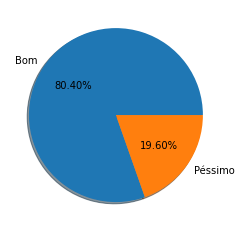

In [596]:
labels = ["Bom", "Péssimo"]
values = [df_count_categoria.select("count").collect()[0][0], df_count_categoria.select("count").collect()[1][0]]

fig, ax = plt.subplots(figsize=(4, 4))

ax.pie(values, labels=labels, autopct="%.2f%%", shadow=True)
plt.show()

#### Gráfico de Barra

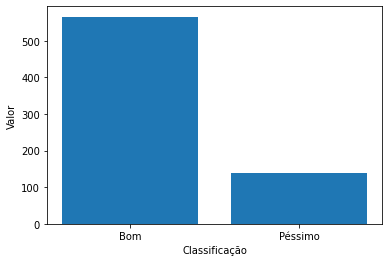

In [625]:
plt.bar(labels, values)
plt.xlabel("Classificação")
plt.ylabel("Valor")
#plt.grid(True)
plt.show()

### Fazendo uma soma da coluna “price” e agrupando por produto_category_name do top 6 (ordene do maior para o menor)

In [649]:
df_sum_price = df_categoria.groupBy('product_category_name').agg({'price':"sum"})
df_sum_price.show()

+---------------------+------------------+
|product_category_name|        sum(price)|
+---------------------+------------------+
|                  pcs|222963.12999999992|
|                bebes|412117.47000000003|
|                artes|24202.639999999992|
|            cine_foto|           6949.36|
|     moveis_decoracao| 736282.4699999999|
|             pc_gamer|           1545.95|
| construcao_ferram...|145509.39000000004|
| tablets_impressao...| 7528.409999999996|
|    artigos_de_festas| 4485.180000000002|
| fashion_roupa_mas...|10797.819999999989|
|     artigos_de_natal|           8800.82|
|           la_cuisine|           2054.99|
|               flores|           1110.04|
|      livros_tecnicos|19149.029999999995|
|                 null|         180277.24|
|       telefonia_fixa| 59622.99000000001|
| construcao_ferram...|40544.520000000026|
|           cool_stuff| 637258.5099999995|
|     eletrodomesticos| 83195.59999999996|
|    livros_importados| 4639.849999999998|
+----------

In [653]:
df_sum_price = df_sum_price.sort(F.desc("sum(price)")).limit(6)
df_sum_price.show(truncate=False)

+----------------------+------------------+
|product_category_name |sum(price)        |
+----------------------+------------------+
|beleza_saude          |1263138.5399999998|
|relogios_presentes    |1206075.3299999998|
|cama_mesa_banho       |1050936.6099999994|
|esporte_lazer         |993656.5100000002 |
|informatica_acessorios|919640.54         |
|moveis_decoracao      |736282.4699999999 |
+----------------------+------------------+



In [659]:
labels = ["beleza_saude", "relogios_presentes", "cama_mesa_banho", "esporte_lazer", "informatica_acessorios", "moveis_decoracao"]
values = [df_sum_price.select("sum(price)").collect()[0][0], df_sum_price.select("sum(price)").collect()[1][0], df_sum_price.select("sum(price)").collect()[2][0], 
          df_sum_price.select("sum(price)").collect()[3][0], df_sum_price.select("sum(price)").collect()[4][0], df_sum_price.select("sum(price)").collect()[5][0]]

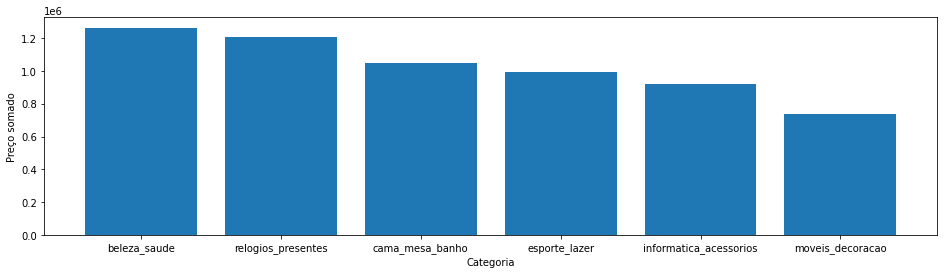

In [660]:
fig, ax = plt.subplots(figsize=(16, 4))

plt.bar(labels, values)
plt.xlabel("Categoria")
plt.ylabel("Preço somado")
#plt.grid(True)
plt.show()

### Gerando o arquivo .parquet

In [662]:
df_categoria.repartition(1).write.mode("overwrite").parquet("./Parquet_Myra")
df_categoria.show(n=5)

+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+--------------------+----------------------+--------------------+-----------------------+-------------------+-----+-------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+------+
|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|        review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|shipping_limit_date|price|freight_value|product_category_name|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|product_length_cm|product_height_cm|product_width_cm|rating|
+------------+------------------------+-------------------+-------------

In [665]:
df_final = spark.read.parquet('./Parquet_Myra')
df_final.show(n=10)

+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+--------------------+----------------------+--------------------+-----------------------+-------------------+------+-------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+------+
|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|        review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|shipping_limit_date| price|freight_value|product_category_name|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|product_length_cm|product_height_cm|product_width_cm|rating|
+------------+------------------------+-------------------+-----------

### Encerrando sessão do PySpark

In [666]:
spark.stop()